###### Importing required libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd
import numpy as np

###### Reading from file

In [2]:
df1 = pd.read_csv('/home/tkarthikeyan/IIT Delhi/COL774-Machine Learning/Assignment 1/ass1_data/data/q3/logisticX.csv', header=None)
df2 = pd.read_csv('/home/tkarthikeyan/IIT Delhi/COL774-Machine Learning/Assignment 1/ass1_data/data/q3/logisticY.csv', header=None)

###### Creating a dataframe

In [3]:
frames = [df1, df2]
df = pd.concat(frames, axis=1, ignore_index=True)
df.rename(columns={0:"X1",1:"X2",2:"Y"},inplace=True)
print(df)

        X1      X2  Y
0   3.8915  4.2105  0
1   3.6898  6.6051  0
2   2.7763  7.5057  0
3   3.1137  5.7724  0
4   2.9251  5.4315  0
..     ...     ... ..
95  5.7629  4.6161  1
96  4.1817  4.0577  1
97  6.3065  2.4776  1
98  5.6043  3.3146  1
99  7.0567  4.7346  1

[100 rows x 3 columns]


###### Describing the data

In [4]:
df.describe()

,X1,X2,Y
count,100.000000,100.000000,100.000000
mean,4.618717,4.522868,0.500000
std,1.325572,1.394154,0.502519
min,1.440000,1.537200,0.000000
25%,3.706600,3.595875,0.000000
50%,4.523700,4.544700,0.500000
75%,5.539200,5.506450,1.000000
max,8.415300,7.505700,1.000000


###### Normalizing the data

In [5]:
norm_df = df.copy()
norm_df["X1"] = (norm_df["X1"] - norm_df["X1"].mean())/norm_df["X1"].std()
norm_df["X2"] = (norm_df["X2"] - norm_df["X2"].mean())/norm_df["X2"].std()

norm_df

,X1,X2,Y
0,-0.548606,-0.224056,0
1,-0.700767,1.493545,0
2,-1.389903,2.139528,0
3,-1.135372,0.896265,0
4,-1.277650,0.651744,0
...,...,...,...
95,0.863162,0.066874,1
96,-0.329682,-0.333656,1
97,1.273249,-1.467031,1
98,0.743515,-0.866667,1


In [6]:
norm_df.describe()

,X1,X2,Y
count,1.000000e+02,1.000000e+02,100.000000
mean,-1.532108e-16,6.827872e-17,0.500000
std,1.000000e+00,1.000000e+00,0.502519
min,-2.397996e+00,-2.141562e+00,0.000000
25%,-6.880931e-01,-6.649143e-01,0.000000
50%,-7.168000e-02,1.565967e-02,0.500000
75%,6.944043e-01,7.055045e-01,1.000000
max,2.864109e+00,2.139528e+00,1.000000


###### Plotting the data with different colors

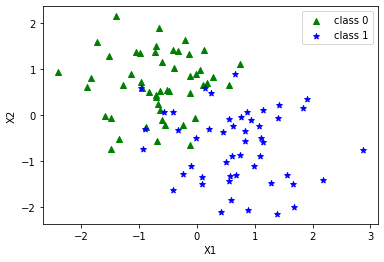

In [7]:
class_0_x = []
class_0_y = []
class_1_x = []
class_1_y = []

for i in range(len(norm_df["X1"])):
    if norm_df["Y"][i] == 0:
        class_0_x.append(norm_df["X1"][i])
        class_0_y.append(norm_df["X2"][i])
    else:
        class_1_x.append(norm_df["X1"][i])
        class_1_y.append(norm_df["X2"][i])
        
plt.scatter(class_0_x,class_0_y,marker="^",color="green")
plt.scatter(class_1_x,class_1_y,marker="*",color="blue")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(["class 0","class 1"])
plt.savefig("xy-plot.png")
plt.show()

###### Newton's method

In [8]:
# Initializing theta to zero
theta = np.zeros((3,1))
# theta = np.random.rand(3,1)
m = norm_df["X1"].count()

print("Size of training set: ", m)

Size of training set:  100


###### Stopping criterion

The stopping criterion is usually of the form $ \| \nabla_\theta J_\theta(x_i) \|_2 $ <= $\phi$, where $\phi$ is small and
positive.

In [9]:
def convergence(grad_J_theta):
    phi = 0.0000000001
    if np.linalg.norm(grad_J_theta) < phi:
        return True
    else:
        return False

###### Sigmoid function

In [10]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

###### Gradient vector

In [11]:
# def get_gradient_vector(Y,H_theta,X,m):
#     n = X.shape[1]
#     G = np.zeros((n,1))
    
#     for i in range(n):
#         X_i = np.array(X[:,i],ndmin=2)
#         G_i = (H_theta - Y)*X_i.T
#         G[i][0] = G_i.sum(axis=0)/m
        
#     return G

In [12]:
def get_gradient_vector(X,Y,H_theta):
    return np.matmul(X.T, H_theta - Y)

###### Hessian matrix

In [13]:
# def get_hessian_matrix(H_theta,X,m):
#     n = X.shape[1]
#     H = np.zeros((n,n))
    
#     for i in range(n):
#         for j in range(i+1):
#             X_i = np.array(X[:,i],ndmin=2)
#             X_j = np.array(X[:,j],ndmin=2)
#             H_ij = H_theta*(1 - H_theta)*X_i.T*X_j.T
#             H[i][j] = H_ij.sum(axis=0)/m
#             H[j][i] = H[i][j]
    
#     return H

In [14]:
def get_hessian_matrix_closed_form(H_theta, X):
    M = np.diag((H_theta*(1 - H_theta)).squeeze())
    return np.matmul(np.matmul(X.T,M),X)

###### Vector Notation

In [15]:
# X = np.hstack(np.array(train_df["X_1"]), np.array(train_df["X_2"]))
a = np.array(norm_df["X1"], ndmin=2)
b = np.array(norm_df["X2"], ndmin=2)
c = np.ones((m,1))
X = np.hstack((c,a.T,b.T))
print("Shape of X is ",X.shape)
# print(X)

Shape of X is  (100, 3)


In [16]:
X.T.shape

(3, 100)

In [17]:
Y = np.array(norm_df["Y"])
Y.resize(m,1)
print("Shape of Y is ",Y.shape)
# print(Y)

Shape of Y is  (100, 1)


###### Algorithm

In [18]:
while(True):
    H_theta = np.matmul(X,theta)
    H_theta = sigmoid(H_theta)
    
    L_theta = (-1)*(Y*np.log(H_theta) + (1 - Y)*np.log(1 - H_theta))
    L_theta = L_theta.sum(axis=0)/m

    grad_L_theta = get_gradient_vector(X,Y,H_theta)
    
    H = get_hessian_matrix_closed_form(H_theta, X)
    H_inv = np.linalg.inv(H)
    
    theta = theta - np.matmul(H_inv,grad_L_theta)
    # theta = theta - (0.01)*grad_L_theta
    
    # print("Theta:",theta)
    print("Loss:",L_theta)
    
    if convergence(grad_L_theta):
        break

Loss: [0.69314718]
Loss: [0.33427659]
Loss: [0.25715466]
Loss: [0.23313639]
Loss: [0.22860969]
Loss: [0.22834279]
Loss: [0.22834145]
Loss: [0.22834145]
Loss: [0.22834145]


###### Final set of parameters

In [19]:
print("Theta: ", theta)

Theta:  [[ 0.40125316]
 [ 2.60158832]
 [-2.7393195 ]]


###### Plotting the data with different colors along with estimated separator line

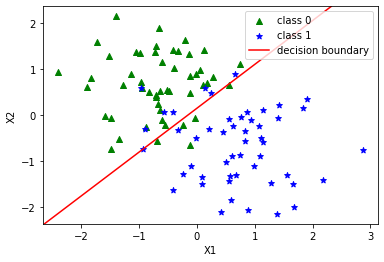

In [20]:
fig = plt.figure()
plt.scatter(class_0_x,class_0_y,marker="^",color="green")
plt.scatter(class_1_x,class_1_y,marker="*",color="blue")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axline((0,-theta[0][0]/theta[2][0]), slope=-theta[1][0]/theta[2][0], color="red")
plt.legend(["class 0","class 1","decision boundary"])
plt.savefig("xy-plot-with-decision-boundary.png")
plt.show()

In [21]:
print("Final set of parameters:")
print(theta)

Final set of parameters:
[[ 0.40125316]
 [ 2.60158832]
 [-2.7393195 ]]


In [22]:
###### Number of misclassifications

# arr = sigmoid(np.matmul(X,theta))

# brr = np.zeros((100,1),dtype="int")
# for i in range(100):
#     if arr[i][0] > 0.5:
#         brr[i][0] = 1
#     else:
#         brr[i][0] = 0
        
# crr = Y - brr

# incorrect = 0
# for i in range(100):
#     if crr[i][0] != 0:
#         incorrect += 1
        
# print("Incorrect classifications: ",incorrect)
# print("Total data: ",m)